Importing of Libraries

In [ ]:
#Importing all the required libraries

import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Ignoring the output compiler warnings given while execution on Google Collab
import warnings
warnings.filterwarnings('ignore')

Initializing the means, class priors and covariances

In [ ]:
#Initializing the values of class means, covariances and class priors

#The class priors for all the 4 classes were uniform
p=0.25

#Means matrix
m0 = np.transpose(np.array([2.2,0,0]))
m1 = np.transpose(np.array([2.2,2.2,0]))
m2 = np.transpose(np.array([2.2,0,2.2]))
m3 = np.transpose(np.array([0,2.2,0]))

#Covariance matrix
c0 = np.array([[1,-0.5,0.3],[-0.5,1,-0.5],[0.3,-0.5,1]])
c1 = np.array([[1,0.5,0],[0.5,1,0.5],[0,0.5,1]])
c2 = np.array([[1,0.3,-0.2],[0.3,1,0.3],[-0.2,0.3,1]])
c3 = np.array([[1,0.3,0.6],[0.3,1,0.3],[0.6,0.3,1]])

In [ ]:
#Defining the MAP_loss and Risk calculation function, which will then be used to check whether the mean, covariance taken lie under an error of 10 to 20%

def risk(i,x,lam_matrix):
  total = 0
  for j in range(4):
    total += lam_matrix[i][j]*p[j]*multivariate_normal.pdf(x,mean[j],cov[j])
  return total

def MAP_loss(gauss,lam_matrix):
  for i in r[gauss]:
    choice = np.argmin([risk(0,i,lam_matrix),risk(1,i,lam_matrix),risk(2,i,lam_matrix),risk(3,i,lam_matrix)])
    loss_matrix[gauss][choice] = loss_matrix[gauss][choice] + 1
  return loss_matrix

Data Generation & Displaying Scatter Plot

In [ ]:
#100 Samples
#Generation of datapoints for 100 samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 100

N=100
N_samples_100 = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]

#Initializing the lambda and loss matrices, to be used in calculation of MAP error
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

#Sample Generation for Class labels 0, 1, 2 & 3
for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_100[0]+=1
  elif a<0.5:
    N_samples_100[1]+=1
  elif a<0.75:
    N_samples_100[2]+=1
  else:
    N_samples_100[3]+=1

#Storing generated samples in list 'r' declared previously, which are being used for MAP_loss function
#for i in range(4):
  #r.append(np.random.multivariate_normal(mean[i],cov[i],N_samples_100[i]))

#Generating random samples for all the 4 classes
r0_100 = np.random.multivariate_normal(m0,c0,N_samples_100[0])
r1_100 = np.random.multivariate_normal(m1,c1,N_samples_100[1])
r2_100 = np.random.multivariate_normal(m2,c2,N_samples_100[2])
r3_100 = np.random.multivariate_normal(m3,c3,N_samples_100[3])
r = [r0_100,r1_100,r2_100,r3_100]

#Calculating MAP to determine overall error obtained from the means and covariances for all 4 classes (0,1,2,3)
MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

#Printing of the total loss
for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

0.17


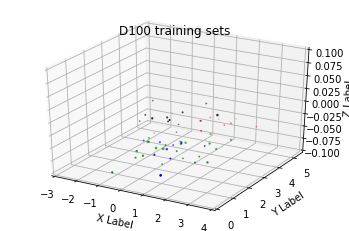

In [ ]:
#Plotting the 3-D scatter plot for 100 Training Samples


ax = plt.axes(projection ="3d")
 
# Creating plot
plt.title("simple 3D scatter plot")
 
plt.scatter(r0_100[:,0],r0_100[:,1],r0_100[:,2],c='b')
plt.scatter(r1_100[:,0],r1_100[:,1],r1_100[:,2],c='r')
plt.scatter(r2_100[:,0],r2_100[:,1],r2_100[:,2],c='g')
plt.scatter(r3_100[:,0],r3_100[:,1],r3_100[:,2],c='k')

#Adding title and labels for x,y,z axis
plt.title("D100 training sets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#Setting scatter plot limits
ax.set_xlim3d(-3,4)
ax.set_ylim3d(0,5.5)
ax.set_zlim3d(-0.1,0.1)

plt.show()

In [ ]:
#200 Samples
#Generation of datapoints for 200 samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 200

N=200
N_samples_200 = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]

#Initializing the lambda and loss matrices, to be used in calculation of MAP error
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

#Sample generation for class labels 0,1,2 & 3
for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_200[0]+=1
  elif a<0.5:
    N_samples_200[1]+=1
  elif a<0.75:
    N_samples_200[2]+=1
  else:
    N_samples_200[3]+=1

r0_200 = np.random.multivariate_normal(m0,c0,N_samples_200[0])
r1_200 = np.random.multivariate_normal(m1,c1,N_samples_200[1])
r2_200 = np.random.multivariate_normal(m2,c2,N_samples_200[2])
r3_200 = np.random.multivariate_normal(m3,c3,N_samples_200[3])
r = [r0_200,r1_200,r2_200,r3_200]

#Calculating loss in the given means and covariance
MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

#Showing output of total loss
for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

0.15


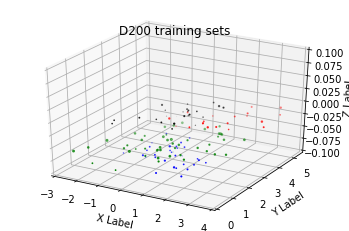

In [ ]:
#Plotting the 3-D scatter plot for 200 Training Samples

ax = plt.axes(projection ="3d")
 
# Creating plot
plt.title("simple 3D scatter plot")
 
plt.scatter(r0_200[:,0],r0_200[:,1],r0_200[:,2],c='b')
plt.scatter(r1_200[:,0],r1_200[:,1],r1_200[:,2],c='r')
plt.scatter(r2_200[:,0],r2_200[:,1],r2_200[:,2],c='g')
plt.scatter(r3_200[:,0],r3_200[:,1],r3_200[:,2],c='k')

#Adding scatter plot title and labels for the 3 different axis
plt.title("D200 training sets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#Setting the scatterplot limits
ax.set_xlim3d(-3,4)
ax.set_ylim3d(0,5.5)
ax.set_zlim3d(-0.1,0.1)

plt.show()

In [ ]:
#500 Samples
#Generation of datapoints for 500 samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 500

N=500
N_samples_500 = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]

#Initializing the lambda and loss matrices, to be used in calculation of MAP error
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

#Generating random samples for classes 0, 1, 2 & 3
for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_500[0]+=1
  elif a<0.5:
    N_samples_500[1]+=1
  elif a<0.75:
    N_samples_500[2]+=1
  else:
    N_samples_500[3]+=1

r0_500 = np.random.multivariate_normal(m0,c0,N_samples_500[0])
r1_500 = np.random.multivariate_normal(m1,c1,N_samples_500[1])
r2_500 = np.random.multivariate_normal(m2,c2,N_samples_500[2])
r3_500 = np.random.multivariate_normal(m3,c3,N_samples_500[3])
r = [r0_500,r1_500,r2_500,r3_500]

#Determining MAP loss for each class (ie 0,1,2,3)
MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

0.18


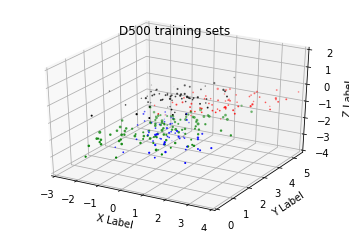

In [ ]:
#Plotting the 3-D scatter plot for 500 Training Samples

ax = plt.axes(projection ="3d")

# Creating plot
plt.title("simple 3D scatter plot")
 
plt.scatter(r0_500[:,0],r0_500[:,1],r0_500[:,2],c='b')
plt.scatter(r1_500[:,0],r1_500[:,1],r1_500[:,2],c='r')
plt.scatter(r2_500[:,0],r2_500[:,1],r2_500[:,2],c='g')
plt.scatter(r3_500[:,0],r3_500[:,1],r3_500[:,2],c='k')

#Adding label and title
plt.title("D500 training sets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#Setting limits of the axes
ax.set_xlim3d(-3,4)
ax.set_ylim3d(0,5.5)
ax.set_zlim3d(-4,2)

plt.show()

In [ ]:
#1000 Samples
#Generation of datapoints for 1000 samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 1000

N=1000
N_samples_1k = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]

#Initializing the lambda and loss matrices, to be used in calculation of MAP error
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_1k[0]+=1
  elif a<0.5:
    N_samples_1k[1]+=1
  elif a<0.75:
    N_samples_1k[2]+=1
  else:
    N_samples_1k[3]+=1

r0_1k = np.random.multivariate_normal(m0,c0,N_samples_1k[0])
r1_1k = np.random.multivariate_normal(m1,c1,N_samples_1k[1])
r2_1k = np.random.multivariate_normal(m2,c2,N_samples_1k[2])
r3_1k = np.random.multivariate_normal(m3,c3,N_samples_1k[3])
r = [r0_1k,r1_1k,r2_1k,r3_1k]

MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

0.186


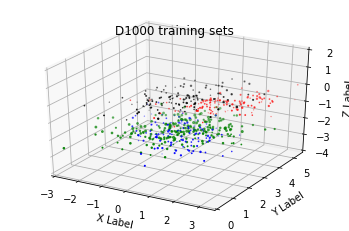

In [ ]:
#Plotting the 3-D scatter plot for 1000 Training Samples

ax = plt.axes(projection ="3d")
 
# Creating plot
plt.title("simple 3D scatter plot")
 
#Creation of scatter plot
plt.scatter(r0_1k[:,0],r0_1k[:,1],r0_1k[:,2],c='b')
plt.scatter(r1_1k[:,0],r1_1k[:,1],r1_1k[:,2],c='r')
plt.scatter(r2_1k[:,0],r2_1k[:,1],r2_1k[:,2],c='g')
plt.scatter(r3_1k[:,0],r3_1k[:,1],r3_1k[:,2],c='k')

#Adding of title and labels of axes
plt.title("D1000 training sets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#Setting limits for the three axes
ax.set_xlim3d(-3,3.5)
ax.set_ylim3d(0,5.5)
ax.set_zlim3d(-4,2)

plt.show()

In [ ]:
#2000 Samples
#Generation of datapoints for 2000 samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 2000

N=2000
N_samples_2k = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]

#Loss & Lambda matrix will be used to determing error and check whether it lies between 10 and 20%
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_2k[0]+=1
  elif a<0.5:
    N_samples_2k[1]+=1
  elif a<0.75:
    N_samples_2k[2]+=1
  else:
    N_samples_2k[3]+=1

r0_2k = np.random.multivariate_normal(m0,c0,N_samples_2k[0])
r1_2k = np.random.multivariate_normal(m1,c1,N_samples_2k[1])
r2_2k = np.random.multivariate_normal(m2,c2,N_samples_2k[2])
r3_2k = np.random.multivariate_normal(m3,c3,N_samples_2k[3])
r = [r0_2k,r1_2k,r2_2k,r3_2k]

#Function call to return error obtained
MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

#Printing total loss
for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

0.1745


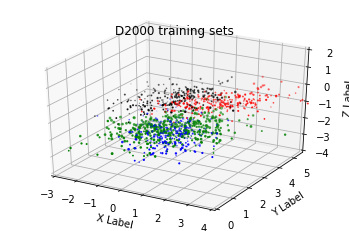

In [ ]:
#Plotting the 3-D scatter plot for 2000 Training Samples

ax = plt.axes(projection ="3d")
 
# Creating plot
plt.title("simple 3D scatter plot")
 
plt.scatter(r0_2k[:,0],r0_2k[:,1],r0_2k[:,2],c='b')
plt.scatter(r1_2k[:,0],r1_2k[:,1],r1_2k[:,2],c='r')
plt.scatter(r2_2k[:,0],r2_2k[:,1],r2_2k[:,2],c='g')
plt.scatter(r3_2k[:,0],r3_2k[:,1],r3_2k[:,2],c='k')

#Setting scatter plot title and axes labels
plt.title("D2000 training sets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#Setting the axes limits
ax.set_xlim3d(-3,4)
ax.set_ylim3d(0,5.5)
ax.set_zlim3d(-4,2)

plt.show()

In [ ]:
#5000 Samples
#Generation of datapoints for 5000 samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 5000

N=5000
N_samples_5k = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]

#Loss and Lambda matrix are being used to determine error
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_5k[0]+=1
  elif a<0.5:
    N_samples_5k[1]+=1
  elif a<0.75:
    N_samples_5k[2]+=1
  else:
    N_samples_5k[3]+=1

r0_5k = np.random.multivariate_normal(m0,c0,N_samples_5k[0])
r1_5k = np.random.multivariate_normal(m1,c1,N_samples_5k[1])
r2_5k = np.random.multivariate_normal(m2,c2,N_samples_5k[2])
r3_5k = np.random.multivariate_normal(m3,c3,N_samples_5k[3])
r = [r0_5k,r1_5k,r2_5k,r3_5k]

MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

#Printing out the error
for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

0.1732


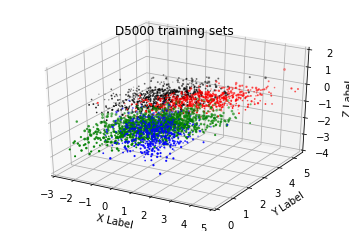

In [ ]:
#Plotting the 3-D scatter plot for 5000 Training Samples

ax = plt.axes(projection ="3d")
 
# Creating plot
plt.title("simple 3D scatter plot")
 
plt.scatter(r0_5k[:,0],r0_5k[:,1],r0_5k[:,2],c='b')
plt.scatter(r1_5k[:,0],r1_5k[:,1],r1_5k[:,2],c='r')
plt.scatter(r2_5k[:,0],r2_5k[:,1],r2_5k[:,2],c='g')
plt.scatter(r3_5k[:,0],r3_5k[:,1],r3_5k[:,2],c='k')

#Displaying title and axes labels
plt.title("D5000 training sets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim3d(-3,5)
ax.set_ylim3d(0,5.5)
ax.set_zlim3d(-4,2)

plt.show()

In [ ]:
#100k Test Data Samples
#Generation of datapoints for 100000 test data samples
#Checking the probability of error (and then printing the error) in the means and covariances when samples are 100k

N=100000
N_samples_100k = [0,0,0,0]
r = []

mean = [m0,m1,m2,m3]
cov = [c0,c1,c2,c3]
p = [0.25,0.25,0.25,0.25]
loss_matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lam_matrix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]

for i in range(N):
  a = random.random()
  if a<0.25:
    N_samples_100k[0]+=1
  elif a<0.5:
    N_samples_100k[1]+=1
  elif a<0.75:
    N_samples_100k[2]+=1
  else:
    N_samples_100k[3]+=1

r0_100k = np.random.multivariate_normal(m0,c0,N_samples_100k[0])
r1_100k = np.random.multivariate_normal(m1,c1,N_samples_100k[1])
r2_100k = np.random.multivariate_normal(m2,c2,N_samples_100k[2])
r3_100k = np.random.multivariate_normal(m3,c3,N_samples_100k[3])
r = [r0_100k,r1_100k,r2_100k,r3_100k]

MAP_loss(0,lam_matrix) 
MAP_loss(1,lam_matrix)
MAP_loss(2,lam_matrix)
MAP_loss(3,lam_matrix)

total_loss = 0

for i in range(4):
  for j in range(4):
    if i!=j:
      total_loss += loss_matrix[i][j]
print(total_loss/N)

error_theo = total_loss/N

0.17567


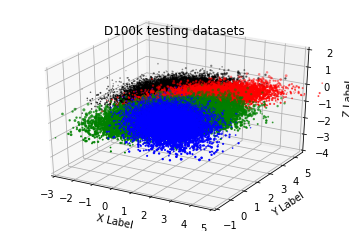

In [ ]:
#Plotting the 3-D scatter plot for 100000 Test Samples

ax = plt.axes(projection ="3d")
 
# Creating plot
plt.title("simple 3D scatter plot")
 
plt.scatter(r0_100k[:,0],r0_100k[:,1],r0_100k[:,2],c='b')
plt.scatter(r1_100k[:,0],r1_100k[:,1],r1_100k[:,2],c='r')
plt.scatter(r2_100k[:,0],r2_100k[:,1],r2_100k[:,2],c='g')
plt.scatter(r3_100k[:,0],r3_100k[:,1],r3_100k[:,2],c='k')

plt.title("D100k testing datasets")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim3d(-3,5)
ax.set_ylim3d(-1,5.5)
ax.set_zlim3d(-4,2)


plt.show()

Model Order Selection, Perceptron Number, Error Calculation

In [ ]:
#Initializing empty list for storing the ideal number of perceptrons for each training sample 
perceptron_number = []

#Initializing empty list to store the probability of error for each training sample
prob_error = []

#Storing the perceptron values in a list to be used for MLP training
p_values = [4,6,8,10,12,14]

In [ ]:
#These are the labels of the test dataset (100k Samples) which will be used on the trained MLP model of each train dataset
#The 4 different classes are concatenated into 1 array of dimension (100000,2)

r_100k = np.concatenate((r0_100k,r1_100k,r2_100k,r3_100k))
a_100k = np.array(np.zeros(N_samples_100k[0]))
b_100k = np.array(np.ones(N_samples_100k[1]))
c_100k = np.array(2*np.ones(N_samples_100k[2])) 
d_100k = np.array(3*np.ones(N_samples_100k[3]))
r_100k_l = np.concatenate((a_100k,b_100k,c_100k,d_100k))
r_100k_labels = r_100k_l.reshape(100000,1) 

100 Samples

In [ ]:
#100 Samples
#These are the labels of the train dataset which contains 100 samples, all of them are concatenated into one list along with their class labels

r_100 = np.concatenate((r0_100,r1_100,r2_100,r3_100))
a_100 = np.array(np.zeros(N_samples_100[0]))
b_100 = np.array(np.ones(N_samples_100[1]))
c_100 = np.array(2*np.ones(N_samples_100[2])) 
d_100 = np.array(3*np.ones(N_samples_100[3]))
r_100_l = np.concatenate((a_100,b_100,c_100,d_100))
r_100_labels = r_100_l.reshape(100,1)

In [ ]:
#The optimal number of perceptrons are obtained via this loop with the help of K fold cross validation and MLP classifier

#An empty list is created to store the accuracy, which will later be used to obtain error
per_number = []

for p in p_values:
    kf = KFold(n_splits=10)
    per_acc = []
    for train_index, validation_index in kf.split(r_100):
      clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(p,4),activation='relu').fit(r_100[train_index,:],r_100_labels[train_index,:])
      clf.out_activation_ = 'softmax'
      acc = clf.score(r_100[validation_index,:],r_100_labels[validation_index,:])
      per_acc.append(acc)
    per_number.append(sum(per_acc))

In [ ]:
#The final optimal number of perceptrons are obtained, printed and then stored in the perceptron number array
final_p_100 =  p_values[np.argmin(np.array(per_number))]
print("Optimal number of Perceptrons: ",final_p_100)
perceptron_number.append(final_p_100)

#After the P number is obtained, the MLP Classifier is again trained with the optimal number of perceptrons
#The accuracy (performance asssessment) is done by applying the trained model on the test data of 100k samples
clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(final_p_100,4),activation='relu').fit(r_100,r_100_labels)
acc_100 = clf.score(r_100k,r_100k_labels) 
err_100  = 1 - acc_100
print("Error Probability after training the model and assessing performance on test dataset: ",err_100)
prob_error.append(err_100)

Optimal number of Perceptrons:  4
Error Probability after training the model and assessing performance on test dataset:  0.37971999999999995


200 Samples

In [ ]:
#200 Samples
#These are the labels of the train dataset which contains 200 samples, all of them are concatenated into one list along with their class labels

r_200 = np.concatenate((r0_200,r1_200,r2_200,r3_200))
a_200 = np.array(np.zeros(N_samples_200[0]))
b_200 = np.array(np.ones(N_samples_200[1]))
c_200 = np.array(2*np.ones(N_samples_200[2])) 
d_200 = np.array(3*np.ones(N_samples_200[3]))
r_200_l = np.concatenate((a_200,b_200,c_200,d_200))
r_200_labels = r_200_l.reshape(200,1)

In [ ]:
#The optimal number of perceptrons are obtained via this loop with the help of K fold cross validation and MLP classifier

#An empty list is created to store the accuracy, which will later be used to obtain error
per_number = []

for p in p_values:
    kf = KFold(n_splits=10)
    per_acc = []
    for train_index, validation_index in kf.split(r_200):
      clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(p,4),activation='relu').fit(r_200[train_index,:],r_200_labels[train_index,:])
      clf.out_activation_ = 'softmax'
      acc = clf.score(r_200[validation_index,:],r_200_labels[validation_index,:])
      per_acc.append(acc)
    per_number.append(sum(per_acc))

In [ ]:
#The final optimal number of perceptrons are obtained, printed and then stored in the perceptron number array
final_p_200 =  p_values[np.argmin(np.array(per_number))]
print("Optimal number of Perceptrons: ",final_p_200)
perceptron_number.append(final_p_200)

#After the P number is obtained, the MLP Classifier is again trained with the optimal number of perceptrons
#The accuracy (performance asssessment) is done by applying the trained model on the test data of 100k samples
clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(final_p_200,4),activation='relu').fit(r_200,r_200_labels)
acc_200 = clf.score(r_100k,r_100k_labels) 
err_200  = 1 - acc_200
print("Error Probability after training the model and assessing performance on test dataset: ",err_200)
prob_error.append(err_200)

Optimal number of Perceptrons:  4
Error Probability after training the model and assessing performance on test dataset:  0.21621999999999997


500 Samples

In [ ]:
#500 Samples
#These are the labels of the train dataset which contains 500 samples, all of them are concatenated into one list along with their class labels

r_500 = np.concatenate((r0_500,r1_500,r2_500,r3_500))
a_500 = np.array(np.zeros(N_samples_500[0]))
b_500 = np.array(np.ones(N_samples_500[1]))
c_500 = np.array(2*np.ones(N_samples_500[2])) 
d_500 = np.array(3*np.ones(N_samples_500[3]))
r_500_l = np.concatenate((a_500,b_500,c_500,d_500))
r_500_labels = r_500_l.reshape(500,1)

In [ ]:
#The optimal number of perceptrons are obtained via this loop with the help of K fold cross validation and MLP classifier

#An empty list is created to store the accuracy, which will later be used to obtain error
per_number = []

for p in p_values:
    kf = KFold(n_splits=10)
    per_acc = []
    for train_index, validation_index in kf.split(r_500):
      clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(p,4),activation='relu').fit(r_500[train_index,:],r_500_labels[train_index,:])
      clf.out_activation_ = 'softmax'
      acc = clf.score(r_500[validation_index,:],r_500_labels[validation_index,:])
      per_acc.append(acc)
    per_number.append(sum(per_acc)) 

In [ ]:
#The final optimal number of perceptrons are obtained, printed and then stored in the perceptron number array
final_p_500 =  p_values[np.argmin(np.array(per_number))]
print("Optimal number of Perceptrons: ",final_p_500)
perceptron_number.append(final_p_500) 

#After the P number is obtained, the MLP Classifier is again trained with the optimal number of perceptrons
#The accuracy (performance asssessment) is done by applying the trained model on the test data of 100k samples
clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(final_p_500,4),activation='relu').fit(r_500,r_500_labels)
acc_500 = clf.score(r_100k,r_100k_labels) 
err_500  = 1 - acc_500
print("Error Probability after training the model and assessing performance on test dataset: ",err_500)
prob_error.append(err_500)

Optimal number of Perceptrons:  6
Error Probability after training the model and assessing performance on test dataset:  0.19382


1000 Samples

In [ ]:
#1000 Samples
#These are the labels of the train dataset which contains 1k samples, all of them are concatenated into one list along with their class labels

r_1k = np.concatenate((r0_1k,r1_1k,r2_1k,r3_1k))
a_1k = np.array(np.zeros(N_samples_1k[0]))
b_1k = np.array(np.ones(N_samples_1k[1]))
c_1k = np.array(2*np.ones(N_samples_1k[2])) 
d_1k = np.array(3*np.ones(N_samples_1k[3]))
r_1k_l = np.concatenate((a_1k,b_1k,c_1k,d_1k))
r_1k_labels = r_1k_l.reshape(1000,1)

In [ ]:
#The optimal number of perceptrons are obtained via this loop with the help of K fold cross validation and MLP classifier

#An empty list is created to store the accuracy, which will later be used to obtain error
per_number = []

for p in p_values:
    kf = KFold(n_splits=10)
    per_acc = []
    for train_index, validation_index in kf.split(r_1k):
      clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(p,4),activation='relu').fit(r_1k[train_index,:],r_1k_labels[train_index,:])
      clf.out_activation_ = 'softmax'
      acc = clf.score(r_1k[validation_index,:],r_1k_labels[validation_index,:])
      per_acc.append(acc)
    per_number.append(sum(per_acc)) 

In [ ]:
#The final optimal number of perceptrons are obtained, printed and then stored in the perceptron number array
final_p_1k =  p_values[np.argmin(np.array(per_number))]
print("Optimal number of Perceptrons: ",final_p_1k)
perceptron_number.append(final_p_1k)

#After the P number is obtained, the MLP Classifier is again trained with the optimal number of perceptrons
#The accuracy (performance asssessment) is done by applying the trained model on the test data of 100k samples
clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(final_p_1k,4),activation='relu').fit(r_1k,r_1k_labels)
acc_1k = clf.score(r_100k,r_100k_labels) 
err_1k  = 1 - acc_1k
print("Error Probability after training the model and assessing performance on test dataset: ",err_1k)
prob_error.append(err_1k)

Optimal number of Perceptrons:  6
Error Probability after training the model and assessing performance on test dataset:  0.19606999999999997


2000 Samples

In [ ]:
#2000 Samples
#These are the labels of the train dataset which contains 2k samples, all of them are concatenated into one list along with their class labels

r_2k = np.concatenate((r0_2k,r1_2k,r2_2k,r3_2k))
a_2k = np.array(np.zeros(N_samples_2k[0]))
b_2k = np.array(np.ones(N_samples_2k[1]))
c_2k = np.array(2*np.ones(N_samples_2k[2])) 
d_2k = np.array(3*np.ones(N_samples_2k[3]))
r_2k_l = np.concatenate((a_2k,b_2k,c_2k,d_2k))
r_2k_labels = r_2k_l.reshape(2000,1)

In [ ]:
#The optimal number of perceptrons are obtained via this loop with the help of K fold cross validation and MLP classifier

#An empty list is created to store the accuracy, which will later be used to obtain error
per_number = []

for p in p_values:
    kf = KFold(n_splits=10)
    per_acc = []
    for train_index, validation_index in kf.split(r_2k):
      clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(p,4),activation='relu').fit(r_2k[train_index,:],r_2k_labels[train_index,:])
      clf.out_activation_ = 'softmax'
      acc = clf.score(r_2k[validation_index,:],r_2k_labels[validation_index,:])
      per_acc.append(acc)
    per_number.append(sum(per_acc)) 

In [ ]:
#The final optimal number of perceptrons are obtained, printed and then stored in the perceptron number array
final_p_2k =  p_values[np.argmin(np.array(per_number))]
print("Optimal number of Perceptrons: ",final_p_2k)
perceptron_number.append(final_p_2k)

#After the P number is obtained, the MLP Classifier is again trained with the optimal number of perceptrons
#The accuracy (performance asssessment) is done by applying the trained model on the test data of 100k samples
clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(final_p_2k,4),activation='relu').fit(r_2k,r_2k_labels)
acc_2k = clf.score(r_2k,r_2k_labels) 
err_2k  = 1 - acc_2k
print("Error Probability after training the model and assessing performance on test dataset: ",err_2k)
prob_error.append(err_2k)

Optimal number of Perceptrons:  8
Error Probability after training the model and assessing performance on test dataset:  0.17600000000000005


5000 Samples

In [ ]:
#5000 Samples
#These are the labels of the train dataset which contains 5k samples, all of them are concatenated into one list along with their class labels

r_5k = np.concatenate((r0_5k,r1_5k,r2_5k,r3_5k))
a_5k = np.array(np.zeros(N_samples_5k[0]))
b_5k = np.array(np.ones(N_samples_5k[1]))
c_5k = np.array(2*np.ones(N_samples_5k[2])) 
d_5k = np.array(3*np.ones(N_samples_5k[3]))
r_5k_l = np.concatenate((a_5k,b_5k,c_5k,d_5k))
r_5k_labels = r_5k_l.reshape(5000,1)

In [ ]:
#The optimal number of perceptrons are obtained via this loop with the help of K fold cross validation and MLP classifier

#An empty list is created to store the accuracy, which will later be used to obtain error
per_number = []

for p in p_values:
    kf = KFold(n_splits=10)
    per_acc = []
    for train_index, validation_index in kf.split(r_5k):
      clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(p,4),activation='relu').fit(r_5k[train_index,:],r_5k_labels[train_index,:])
      clf.out_activation_ = 'softmax'
      acc = clf.score(r_5k[validation_index,:],r_5k_labels[validation_index,:])
      per_acc.append(acc)
    per_number.append(sum(per_acc)) 

In [ ]:
#The final optimal number of perceptrons are obtained, printed and then stored in the perceptron number array
final_p_5k =  p_values[np.argmin(np.array(per_number))]
print("Optimal number of Perceptrons: ",final_p_5k)
perceptron_number.append(final_p_5k)

clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(final_p_5k,4),activation='relu').fit(r_5k,r_5k_labels)
acc_5k = clf.score(r_100k,r_100k_labels) 
err_5k  = 1 - acc_5k
print("Error Probability after training the model and assessing performance on test dataset: ",err_5k)
prob_error.append(err_5k) 

Optimal number of Perceptrons:  10
Error Probability after training the model and assessing performance on test dataset:  0.18476000000000004


In [ ]:
#Displaying lists formed by perceptron number (Optimum) & Error Probability
print("The ideal perceptron numbers for all training datasets is: ",perceptron_number)
print("The corresponding error probability is: ",prob_error)

The ideal perceptron numbers for all training datasets is:  [4, 4, 6, 6, 8, 10]
The corresponding error probability is:  [0.37971999999999995, 0.21621999999999997, 0.19382, 0.19606999999999997, 0.17600000000000005, 0.18476000000000004]


Plotting graphs to demonstrate the output obtained

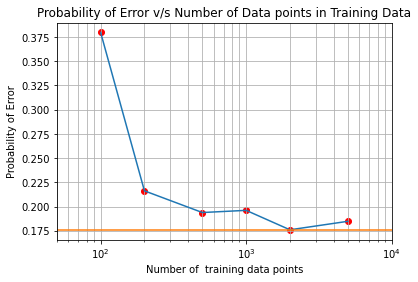

In [ ]:
#Plotting graph for Probability of Error v/s Number of Data points in Training Data
data_points = [100,200,500,1000,2000,5000]
plt.grid(True, which='both')
plt.semilogx(data_points,prob_error)
plt.scatter(data_points,prob_error,c='r')
plt.xlabel("Number of  training data points")
plt.ylabel("Probability of Error")
plt.title("Probability of Error v/s Number of Data points in Training Data")
plt.plot([50,10000],[error_theo,error_theo])
plt.xlim(50,10000)
plt.show()

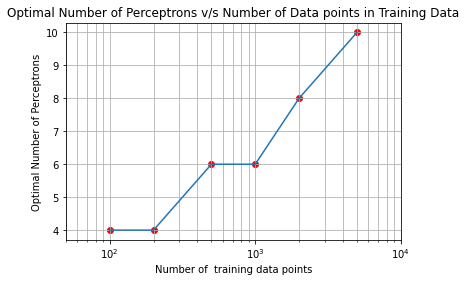

In [ ]:
#Plotting graph for Optimal Number of Perceptrons v/s Number of Data points in Training Data
data_points = [100,200,500,1000,2000,5000]
plt.grid(True, which='both')
plt.semilogx(data_points,perceptron_number)
plt.scatter(data_points,perceptron_number,c='r')
plt.xlabel("Number of  training data points")
plt.ylabel("Optimal Number of Perceptrons")
plt.title("Optimal Number of Perceptrons v/s Number of Data points in Training Data")
plt.xlim(50,10000)
plt.show()